In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

In [ ]:
# 1. Load Public Dataset
employee_attrition = pd.read_csv('/content/Employee_Attrition.csv')
print("== Data Head ==")
print(employee_attrition.head())

== Data Head ==
   Emp ID  satisfaction_level  last_evaluation  number_project  \
0     1.0                0.38             0.53             2.0   
1     2.0                0.80             0.86             5.0   
2     3.0                0.11             0.88             7.0   
3     4.0                0.72             0.87             5.0   
4     5.0                0.37             0.52             2.0   

   average_montly_hours  time_spend_company  Work_accident  \
0                 157.0                 3.0            0.0   
1                 262.0                 6.0            0.0   
2                 272.0                 4.0            0.0   
3                 223.0                 5.0            0.0   
4                 159.0                 3.0            0.0   

   promotion_last_5years   dept  salary  
0                    0.0  sales     low  
1                    0.0  sales  medium  
2                    0.0  sales  medium  
3                    0.0  sales     low  
4   

In [ ]:
employee_attrition

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low
...,...,...,...,...,...,...,...,...,...,...
15782,14995.0,0.40,0.57,2.0,151.0,3.0,0.0,0.0,support,low
15783,14996.0,0.37,0.48,2.0,160.0,3.0,0.0,0.0,support,low
15784,14997.0,0.37,0.53,2.0,143.0,3.0,0.0,0.0,support,low
15785,14998.0,0.11,0.96,6.0,280.0,4.0,0.0,0.0,support,low


In [ ]:
employee_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB


In [ ]:
employee_attrition.rename(columns=str.title, inplace=True)

In [ ]:
print("Missing values before cleaning :")
employee_attrition.isnull().sum()

Missing values before cleaning :


,0
Emp Id,788
Satisfaction_Level,788
Last_Evaluation,788
Number_Project,788
Average_Montly_Hours,788
Time_Spend_Company,788
Work_Accident,788
Promotion_Last_5Years,788
Dept,788
Salary,788


In [ ]:
#handling missing values

#kolom float
employee_attrition["Emp Id"] = employee_attrition["Emp Id"].fillna(employee_attrition["Emp Id"].median())
employee_attrition["Satisfaction_Level"] = employee_attrition["Satisfaction_Level"].fillna(employee_attrition["Satisfaction_Level"].median())
employee_attrition["Last_Evaluation"] = employee_attrition["Last_Evaluation"].fillna(employee_attrition["Last_Evaluation"].median())
employee_attrition["Number_Project"] = employee_attrition["Number_Project"].fillna(employee_attrition["Number_Project"].median())
employee_attrition["Average_Montly_Hours"] = employee_attrition["Average_Montly_Hours"].fillna(employee_attrition["Average_Montly_Hours"].median())
employee_attrition["Time_Spend_Company"] = employee_attrition["Time_Spend_Company"].fillna(employee_attrition["Time_Spend_Company"].median())
employee_attrition["Work_Accident"] = employee_attrition["Work_Accident"].fillna(employee_attrition["Work_Accident"].median())
employee_attrition["Promotion_Last_5Years"] = employee_attrition["Promotion_Last_5Years"].fillna(employee_attrition["Promotion_Last_5Years"].median())

#kolom object
employee_attrition["Dept"] = employee_attrition["Dept"].fillna(employee_attrition["Dept"].mode()[0])
employee_attrition["Salary"] = employee_attrition["Salary"].fillna(employee_attrition["Salary"].mode()[0])

print("Missing values setelah Cleaning")
print(employee_attrition.isnull().sum())

Missing values setelah Cleaning
Emp Id                   0
Satisfaction_Level       0
Last_Evaluation          0
Number_Project           0
Average_Montly_Hours     0
Time_Spend_Company       0
Work_Accident            0
Promotion_Last_5Years    0
Dept                     0
Salary                   0
dtype: int64


In [ ]:
#konversi tipe data
employee_attrition["Emp Id"] = employee_attrition["Emp Id"].astype(int)
employee_attrition["Satisfaction_Level"] = employee_attrition["Satisfaction_Level"].astype(int)
employee_attrition["Last_Evaluation"] = employee_attrition["Last_Evaluation"].astype(int)
employee_attrition["Number_Project"] = employee_attrition["Number_Project"].astype(int)
employee_attrition["Average_Montly_Hours"] = employee_attrition["Average_Montly_Hours"].astype(int)
employee_attrition["Time_Spend_Company"] = employee_attrition["Time_Spend_Company"].astype(int)
employee_attrition["Work_Accident"] = employee_attrition["Work_Accident"].astype(int)
employee_attrition["Promotion_Last_5Years"] = employee_attrition["Promotion_Last_5Years"].astype(int)


In [ ]:
#duplicated data
employee_attrition.duplicated().sum()

np.int64(787)

In [ ]:
employee_attrition_clean = employee_attrition.drop_duplicates()
print(employee_attrition_clean)

       Emp Id  Satisfaction_Level  Last_Evaluation  Number_Project  \
0           1                   0                0               2   
1           2                   0                0               5   
2           3                   0                0               7   
3           4                   0                0               5   
4           5                   0                0               2   
...       ...                 ...              ...             ...   
15782   14995                   0                0               2   
15783   14996                   0                0               2   
15784   14997                   0                0               2   
15785   14998                   0                0               6   
15786   14999                   0                0               2   

       Average_Montly_Hours  Time_Spend_Company  Work_Accident  \
0                       157                   3              0   
1                       262

In [ ]:
#clean after drop duplicated
employee_attrition_clean.duplicated().sum()

np.int64(0)

In [ ]:
# Categorical vs. Numerical Variables
# Identifying categorical and numerical columns.
categorical_cols = employee_attrition_clean.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = employee_attrition_clean.select_dtypes(include=['number']).columns.tolist()
print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['Dept', 'Salary']
Numerical columns: ['Emp Id', 'Satisfaction_Level', 'Last_Evaluation', 'Number_Project', 'Average_Montly_Hours', 'Time_Spend_Company', 'Work_Accident', 'Promotion_Last_5Years']


In [ ]:
employee_attrition_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Emp Id,15000.0,7500.000000,4329.838334,1.0,3750.75,7500.0,11249.25,14999.0
Satisfaction_Level,15000.0,0.007400,0.085707,0.0,0.00,0.0,0.00,1.0
Last_Evaluation,15000.0,0.018867,0.136059,0.0,0.00,0.0,0.00,1.0
Number_Project,15000.0,3.803067,1.232552,2.0,3.00,4.0,5.00,7.0
Average_Montly_Hours,15000.0,201.050267,49.941435,96.0,156.00,200.0,245.00,310.0
Time_Spend_Company,15000.0,3.498200,1.460093,2.0,3.00,3.0,4.00,10.0
Work_Accident,15000.0,0.144600,0.351709,0.0,0.00,0.0,0.00,1.0
Promotion_Last_5Years,15000.0,0.021267,0.144277,0.0,0.00,0.0,0.00,1.0


In [ ]:
#Show Numeric and Categorical Features separately
employee_attrition_numeric = employee_attrition_clean[['Satisfaction_Level', 'Last_Evaluation', 'Number_Project', 'Average_Montly_Hours', 'Time_Spend_Company', 'Work_Accident', 'Promotion_Last_5Years']]

employee_attrition_categorical = employee_attrition_clean[['Dept', 'Salary']]

In [ ]:
employee_attrition['Salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

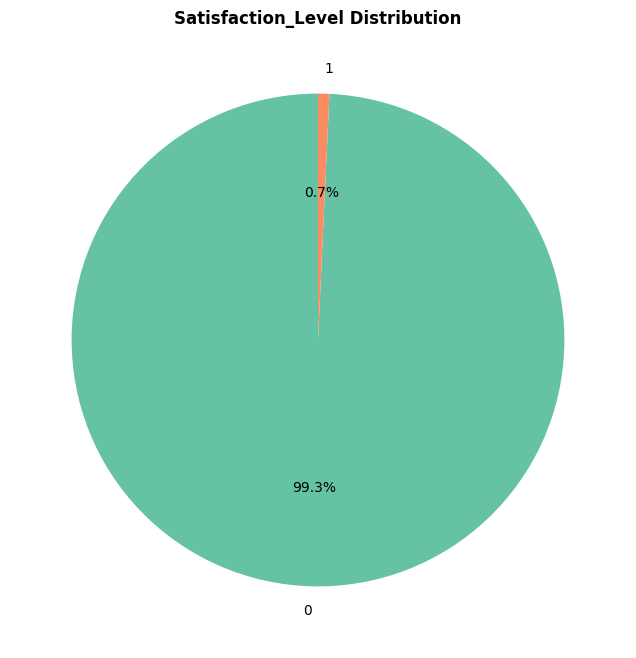

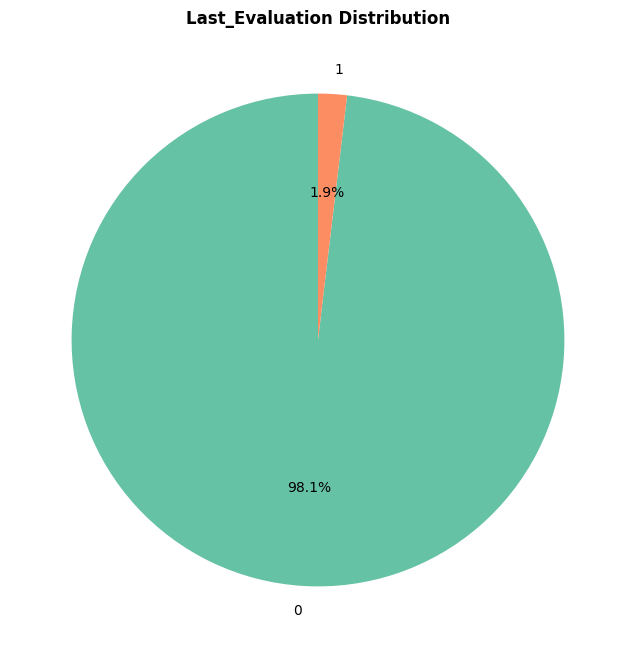

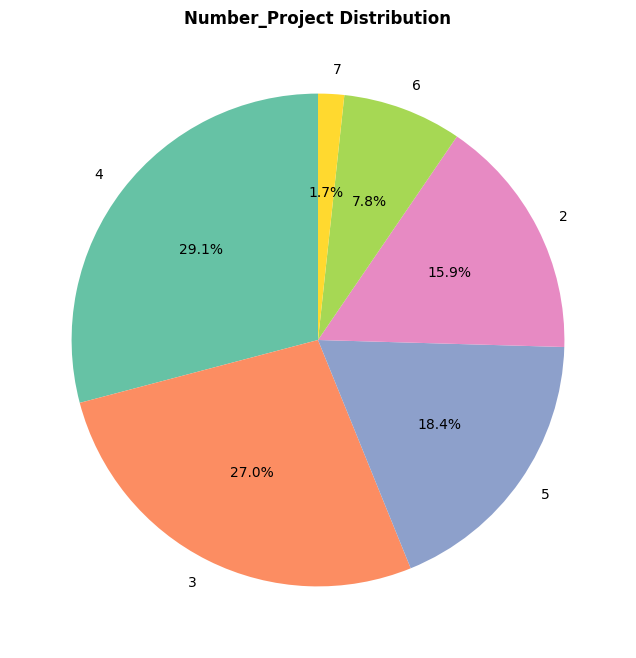

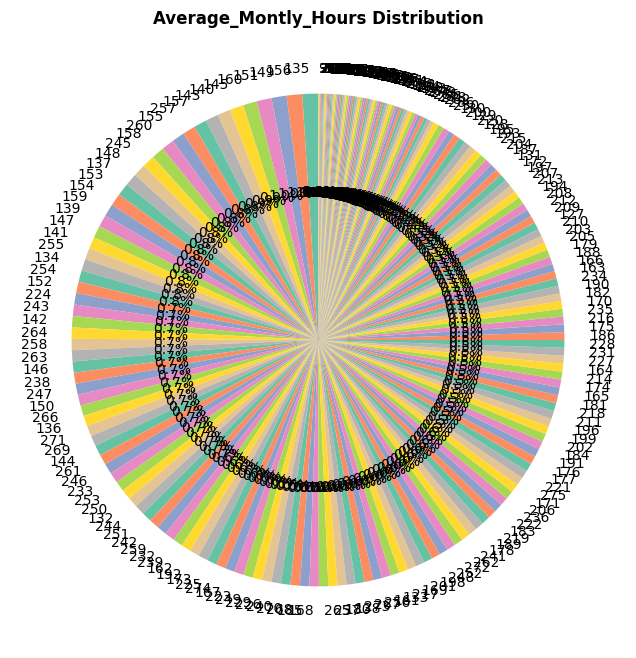

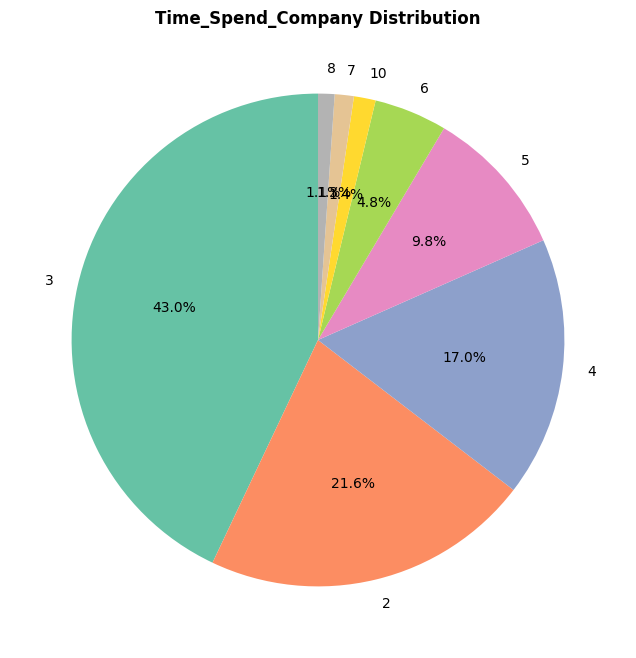

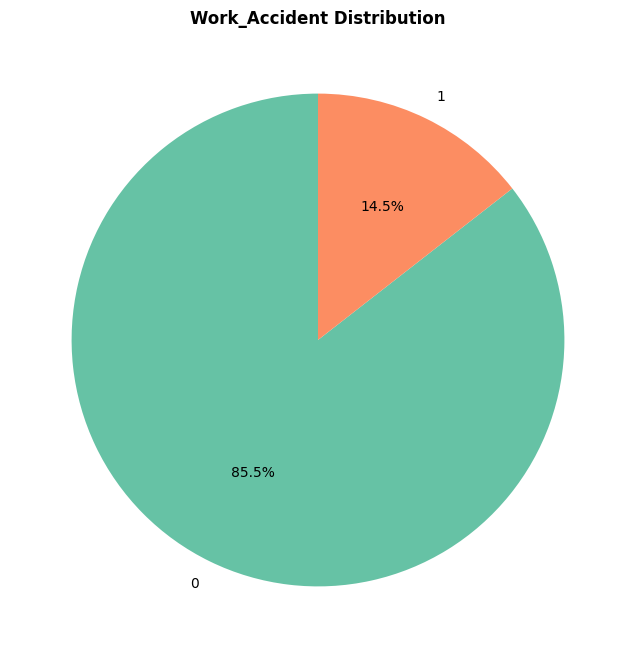

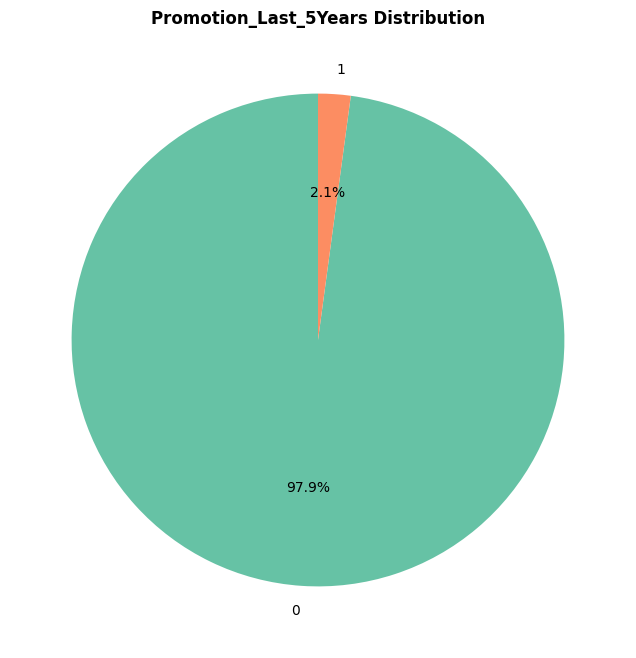

In [ ]:
#numeric distribution
for col in employee_attrition_numeric.columns:
    plt.figure(figsize=(8, 8))
    plt.pie(employee_attrition_numeric[col].value_counts(), labels=employee_attrition_numeric[col].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
    plt.title(col + ' Distribution', weight = 'bold')
    plt.show()
    print()

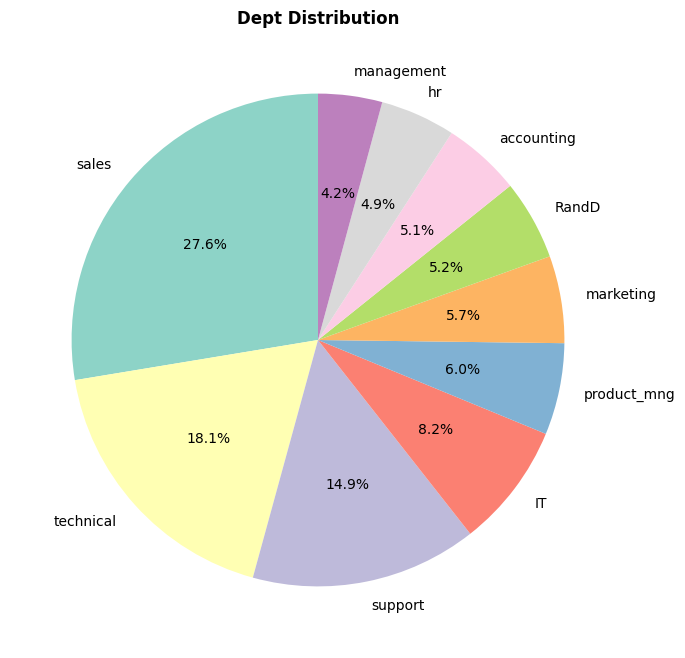

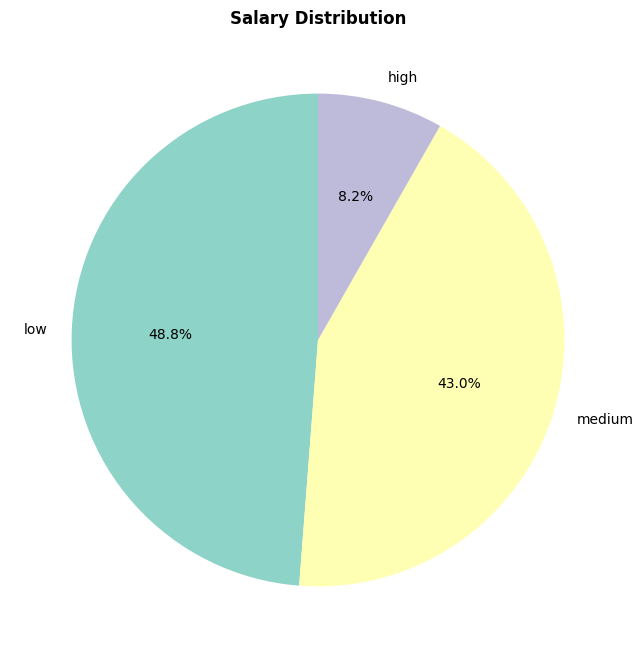

In [ ]:
#categorical distribution
for col in employee_attrition_categorical.columns:
    plt.figure(figsize=(8, 8))
    plt.pie(employee_attrition_categorical[col].value_counts(), labels=employee_attrition_categorical[col].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
    plt.title(col + ' Distribution', weight = 'bold')
    plt.show()
    print()

#### Insight for categorical data:
The Company has 27,6% of Sales employees following 18,1% of Technical employees which indicate Company with a high proportion of both sales and technical employees are typically found in industries where products and services are complex, require specialized knowledge, and involve a significant amount of B2B interaction or post-sales support.
For salary distribution, employees have mostly low salary with 48,8%, following with the 43,0% of medium and 8,2% of high salary which indicate almost half of the entire employees have low salary in this company. Companies that generally provide lower salaries to employees operate in sectors characterized by low barriers to entry, high competition, low-skill job requirements, and often thin profit margins.


### relationship between each variables

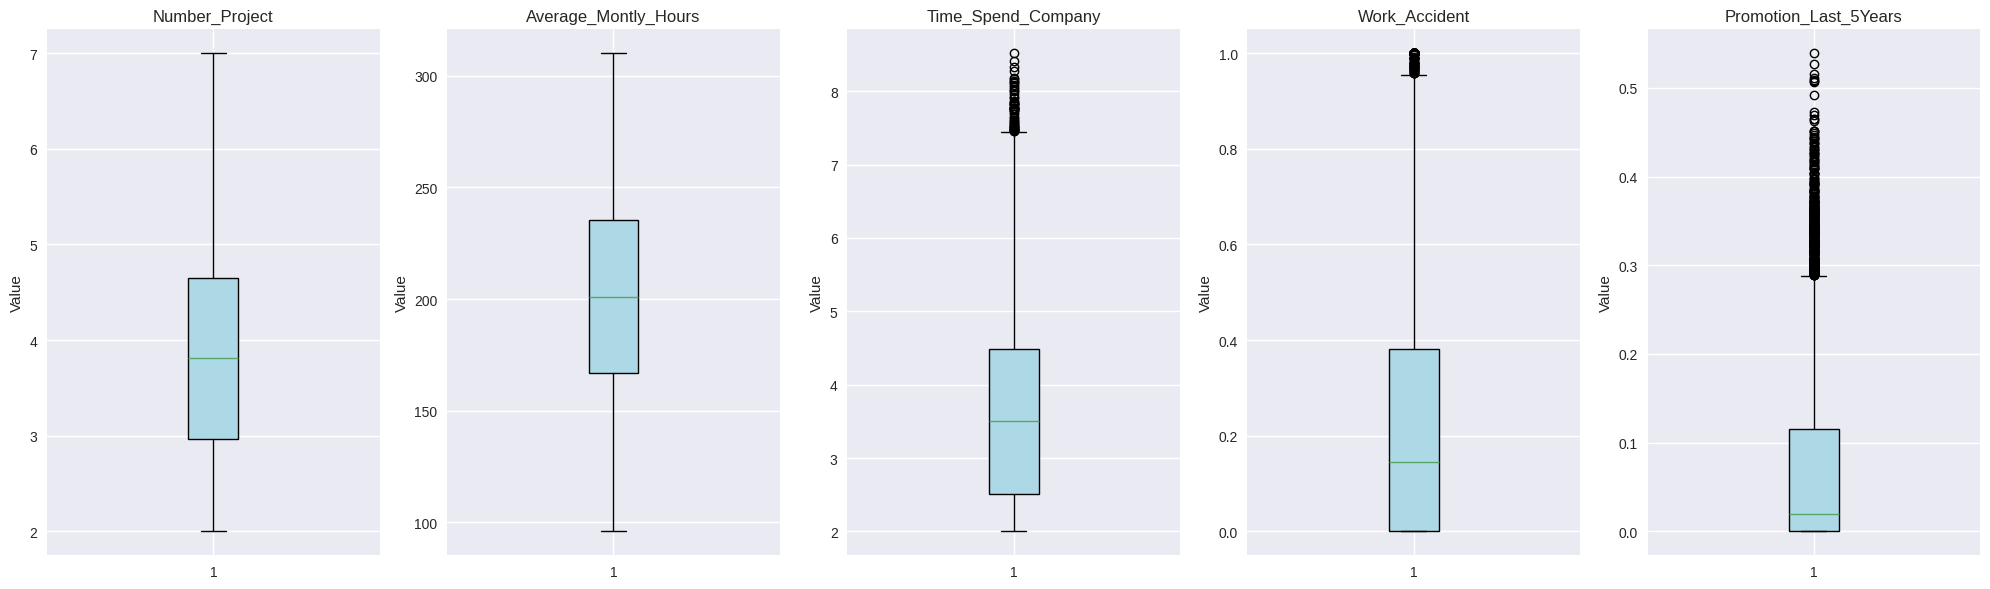

In [ ]:
# Simulate data based on summary stats
def simulate_data(mean, std, count, min_val, max_val):
    data = np.random.normal(loc=mean, scale=std, size=count)
    return np.clip(data, min_val, max_val)

# Create DataFrame
data = pd.DataFrame({
    "Number_Project": simulate_data(3.803067, 1.232552, 15000, 2.0, 7.0),
    "Average_Montly_Hours": simulate_data(201.050267, 49.941435, 15000, 96.0, 310.0),
    "Time_Spend_Company": simulate_data(3.498200, 1.460093, 15000, 2.0, 10.0),
    "Work_Accident": simulate_data(0.144600, 0.351709, 15000, 0.0, 1.0),
    "Promotion_Last_5Years": simulate_data(0.021267, 0.144277, 15000, 0.0, 1.0)
})

# Plot boxplots
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))
for ax, column in zip(axes, data.columns):
    ax.boxplot(data[column], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_title(column)
    ax.set_ylabel("Value")

plt.tight_layout()
plt.savefig("boxplots_with_outliers.png")


###Insight of each numeric data distribution =
1. Number Project : Most employees handle around 3 - 5 projects but others' handle around 6 - 7 projects due to high performance of work or overburdened.
2. Monthly Hours : Most employees work around 200 hours per month, which corresponds to a standard 8-hour workday in a typical 9 to 5 schedule. The minimum recorded workload is about 100 hours per month or roughly 4 hours per day, suggesting part-time work or reduced schedules. Some employees put in overtime on weekends, while the maximum workload exceeds 300 hours per month or around 12 hours per day. This indicates that certain employees regularly extend their weekday shifts by about 4 extra hours, reflecting significant overtime commitments.
3. Time Spend : Most employees are relatively new with around 3- 4 years in the company. Outliers above 8 years may represent loyal veterans or stagnation.
4. Work Accident : This indicates that the company has a very low overall accident rate, similar to what is typically seen in office work, retail, or administrative environments. The outliers suggest that accidents can still occur due to human error, unexpected events, or unusual circumstances.
5. Promotion 5 Years : Promotions are infrequent. Outliers above 0.3 may reflect a few fast-track employees or data encoding quirks.

In [ ]:
print("Distribution Employee of Each Departments :")
employee_attrition_clean["Dept"].value_counts()

Distribution Employee of Each Departments :


,count
Dept,
sales,4141
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [ ]:
print("Distribution of Satisfaction_Level :")
employee_attrition_clean["Satisfaction_Level"].value_counts()

Distribution of Satisfaction_Level :


,count
Satisfaction_Level,
0,14889
1,111


In [ ]:
print("Distribution of Last_Evaluation :")
employee_attrition_clean["Last_Evaluation"].value_counts()

Distribution of Last_Evaluation :


,count
Last_Evaluation,
0,14717
1,283


In [ ]:
#The relationship between the Departement and Salary variables
Dept_Salary_counts = employee_attrition_clean.groupby('Dept')['Salary'].value_counts().unstack(fill_value=0)
display(Dept_Salary_counts)

Salary,high,low,medium
Dept,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2100,1772
support,141,1146,942


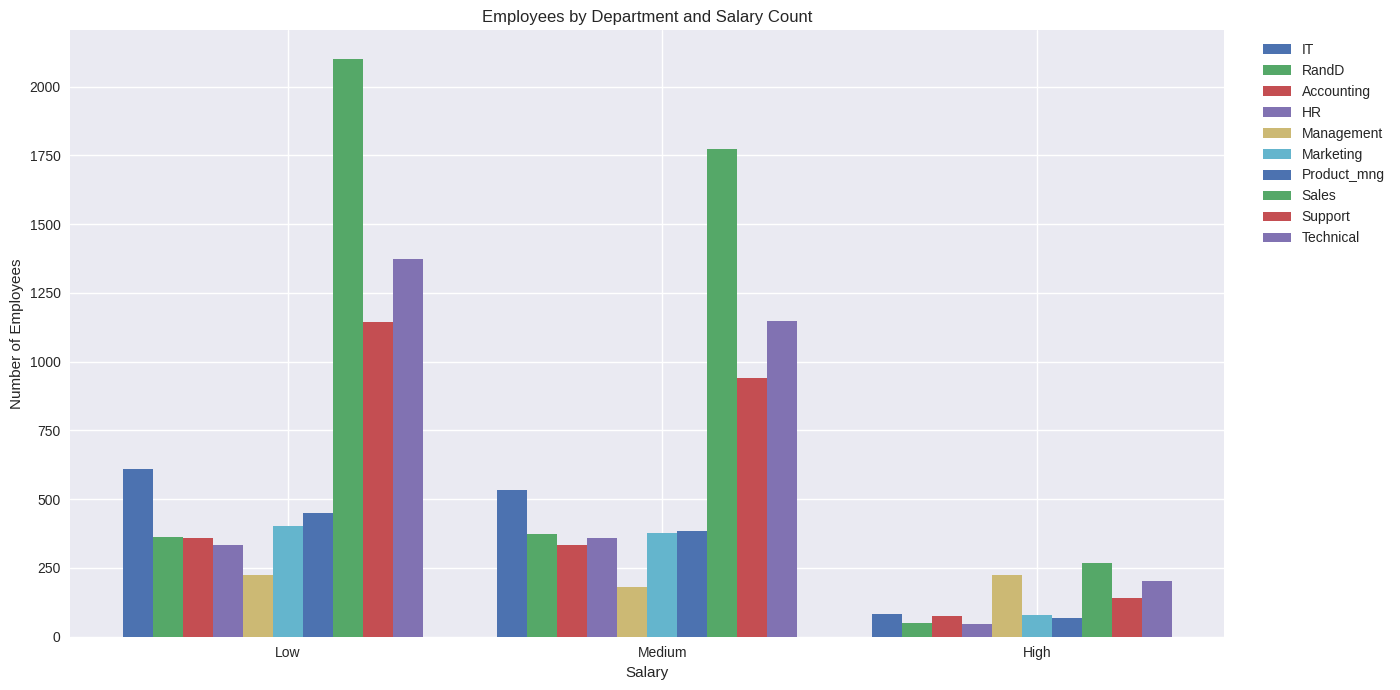

In [ ]:
# Bar Chart for Relationship between Department and Time Spend Company
departments = ['IT', 'RandD', 'Accounting', 'HR', 'Management', 'Marketing',
               'Product_mng', 'Sales', 'Support', 'Technical']
Salary_counts = ['Low', 'Medium', 'High']

data = {
    'IT' :	[609, 535, 83],
    'RandD' :[364,	372, 51],
    'Accounting' :	[358,	335, 74],
    'HR':	[335,	359, 45],
    'Management' :[225,	180,	225],
    'Marketing' :	[402,	376, 80],
    'Product_mng' :	[451,	383, 68],
    'Sales' :	[2100,	1772, 269],
    'Support'	 : [1146,	942, 141],
    'Technical' :	[1372,	1147, 201]

}

# Plot setup
x = np.arange(len(Salary_counts))  # positions for project counts
bar_width = 0.08
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each department
for i, dept in enumerate(departments):
    offset = (i - len(departments)/2) * bar_width
    ax.bar(x + offset, data[dept], width=bar_width, label=dept)

# Labels and legend
ax.set_xlabel('Salary')
ax.set_ylabel('Number of Employees')
ax.set_title('Employees by Department and Salary Count')
ax.set_xticks(x)
ax.set_xticklabels(Salary_counts)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()


### TOP 3 Low Salary by Departement :
#### 1. Sales
#### 2. Technical
#### 3. Support

### TOP 3 Medium Salary by Departement :
#### 1. Sales
#### 2. Technical
#### 3. Support

### TOP 3 High Salary by Departement :
#### 1. Sales
#### 2. Management
#### 3. Technical

In [ ]:
#The relationship between the Departement and Satisfaction Level variables
Dept_SatisLevel_counts = employee_attrition_clean.groupby('Dept')['Satisfaction_Level'].value_counts().unstack(fill_value=0)
display(Dept_SatisLevel_counts)

Satisfaction_Level,0,1
Dept,,
IT,1217,10
RandD,783,4
accounting,764,3
hr,734,5
management,626,4
marketing,854,4
product_mng,895,7
sales,4111,30
support,2211,18


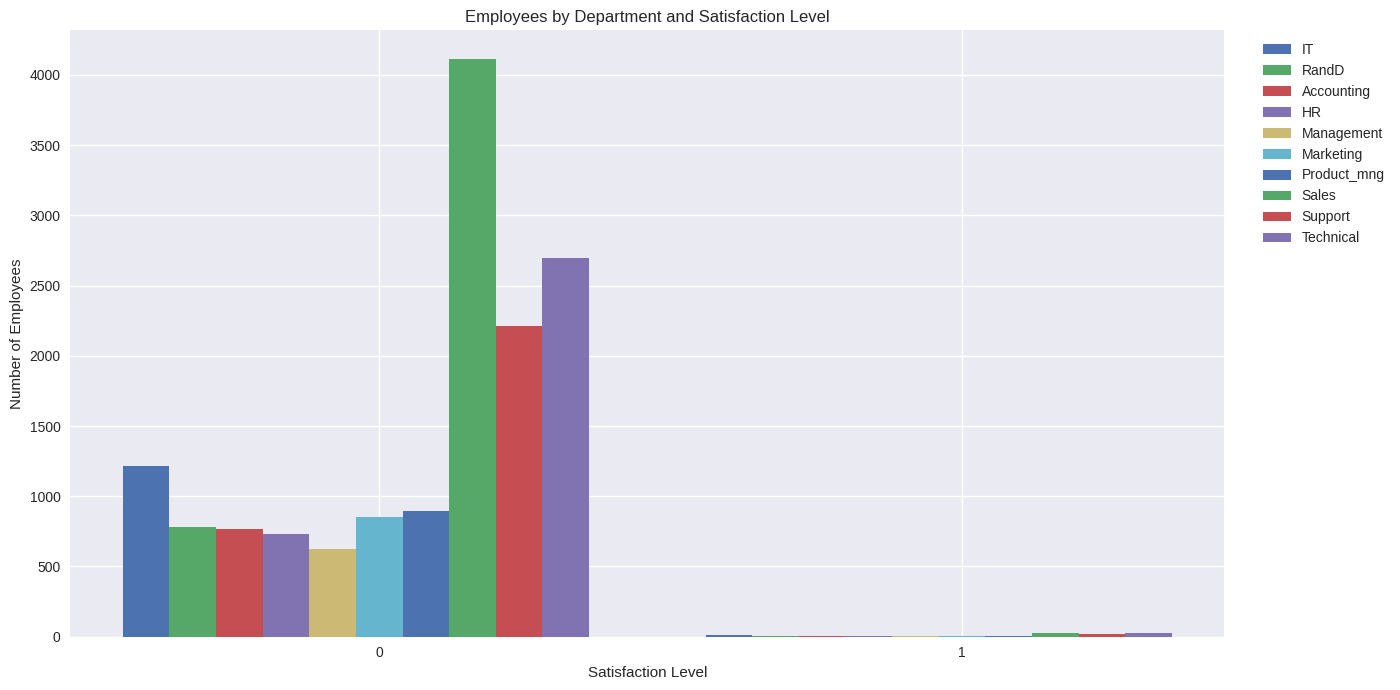

In [ ]:
# Bar Chart for Relationship between Department and Satisfaction Level
departments = ['IT', 'RandD', 'Accounting', 'HR', 'Management', 'Marketing',
               'Product_mng', 'Sales', 'Support', 'Technical']
satisfaction_level_counts = [0, 1]

data = {
    'IT' :	[1217, 10],
    'RandD' :[783,	4],
    'Accounting' :	[764, 3],
    'HR':	[734,	5],
    'Management' :[626,	4],
    'Marketing' :	[854,	4],
    'Product_mng' :	[895,	7],
    'Sales' :	[4111,	30],
    'Support'	 : [2211,	18],
    'Technical' :	[2694,	26]

}

# Plot setup
x = np.arange(len(satisfaction_level_counts))
bar_width = 0.08
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each department
for i, dept in enumerate(departments):
    offset = (i - len(departments)/2) * bar_width
    ax.bar(x + offset, data[dept], width=bar_width, label=dept)

# Labels and legend
ax.set_xlabel('Satisfaction Level')
ax.set_ylabel('Number of Employees')
ax.set_title('Employees by Department and Satisfaction Level')
ax.set_xticks(x)
ax.set_xticklabels(satisfaction_level_counts)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()


In [ ]:
#The relationship between the Departement and Last Evaluation variables
Dept_LastEvaluation_counts = employee_attrition_clean.groupby('Dept')['Last_Evaluation'].value_counts().unstack(fill_value=0)
display(Dept_LastEvaluation_counts)

Last_Evaluation,0,1
Dept,,
IT,1214,13
RandD,770,17
accounting,742,25
hr,726,13
management,621,9
marketing,843,15
product_mng,890,12
sales,4062,79
support,2197,32


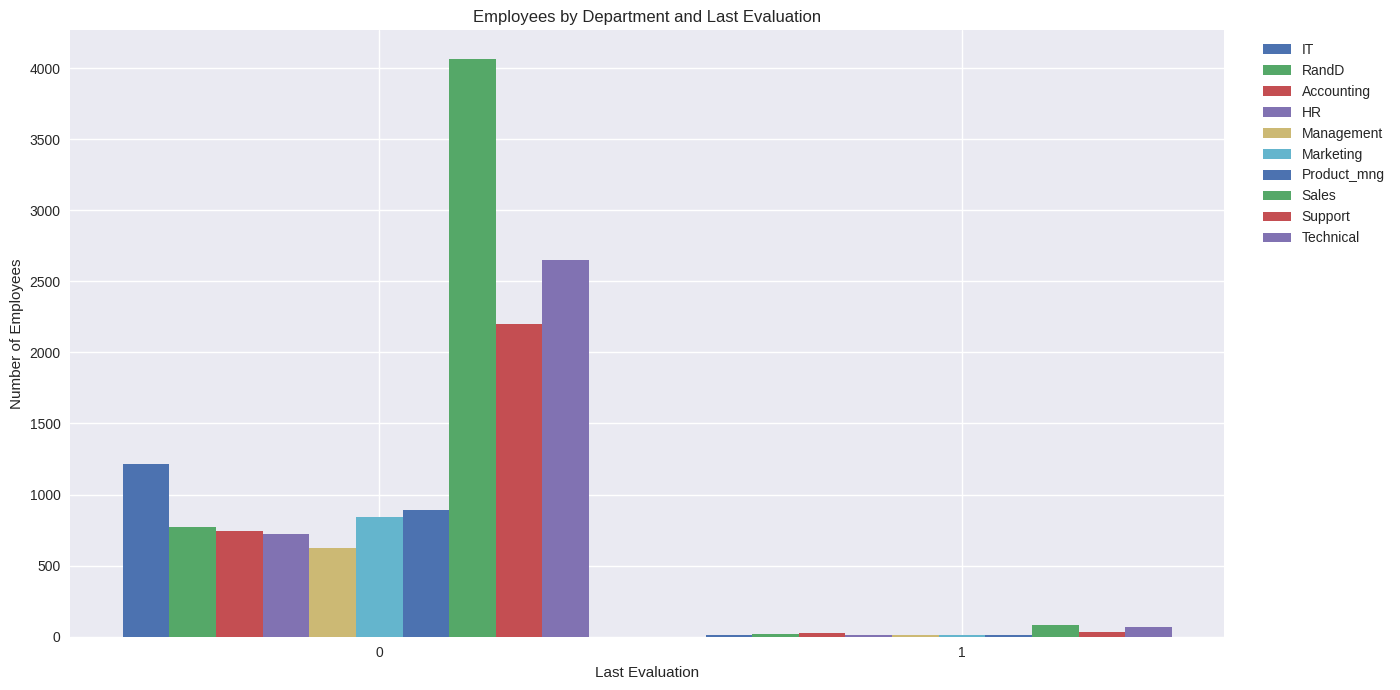

In [ ]:
# Bar Chart for Relationship between Department and Satisfaction Level
departments = ['IT', 'RandD', 'Accounting', 'HR', 'Management', 'Marketing',
               'Product_mng', 'Sales', 'Support', 'Technical']
last_evaluation_counts = [0, 1]

data = {
    'IT' :	[1214, 13],
    'RandD' :[770,	17],
    'Accounting' :	[742, 25],
    'HR':	[726,	13],
    'Management' :[621,	9],
    'Marketing' :	[843,	15],
    'Product_mng' :	[890,	12],
    'Sales' :	[4062,	79],
    'Support'	 : [2197,	32],
    'Technical' :	[2652,	68]

}

# Plot setup
x = np.arange(len(last_evaluation_counts))
bar_width = 0.08
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each department
for i, dept in enumerate(departments):
    offset = (i - len(departments)/2) * bar_width
    ax.bar(x + offset, data[dept], width=bar_width, label=dept)

# Labels and legend
ax.set_xlabel('Last Evaluation')
ax.set_ylabel('Number of Employees')
ax.set_title('Employees by Department and Last Evaluation')
ax.set_xticks(x)
ax.set_xticklabels(last_evaluation_counts)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()


In [ ]:
#The relationship between the Departement and Number Project variables
Dept_NP_counts = employee_attrition_clean.groupby('Dept')['Number_Project'].value_counts().unstack(fill_value=0)
display(Dept_NP_counts)

Number_Project,2,3,4,5,6,7
Dept,,,,,,
IT,182,347,347,236,95,20
RandD,87,247,225,163,52,13
accounting,126,199,221,140,66,15
hr,140,216,222,94,54,13
management,79,171,207,118,42,13
marketing,154,247,251,140,51,15
product_mng,149,235,262,169,71,16
sales,717,1090,1191,755,321,67
support,350,596,650,433,174,26


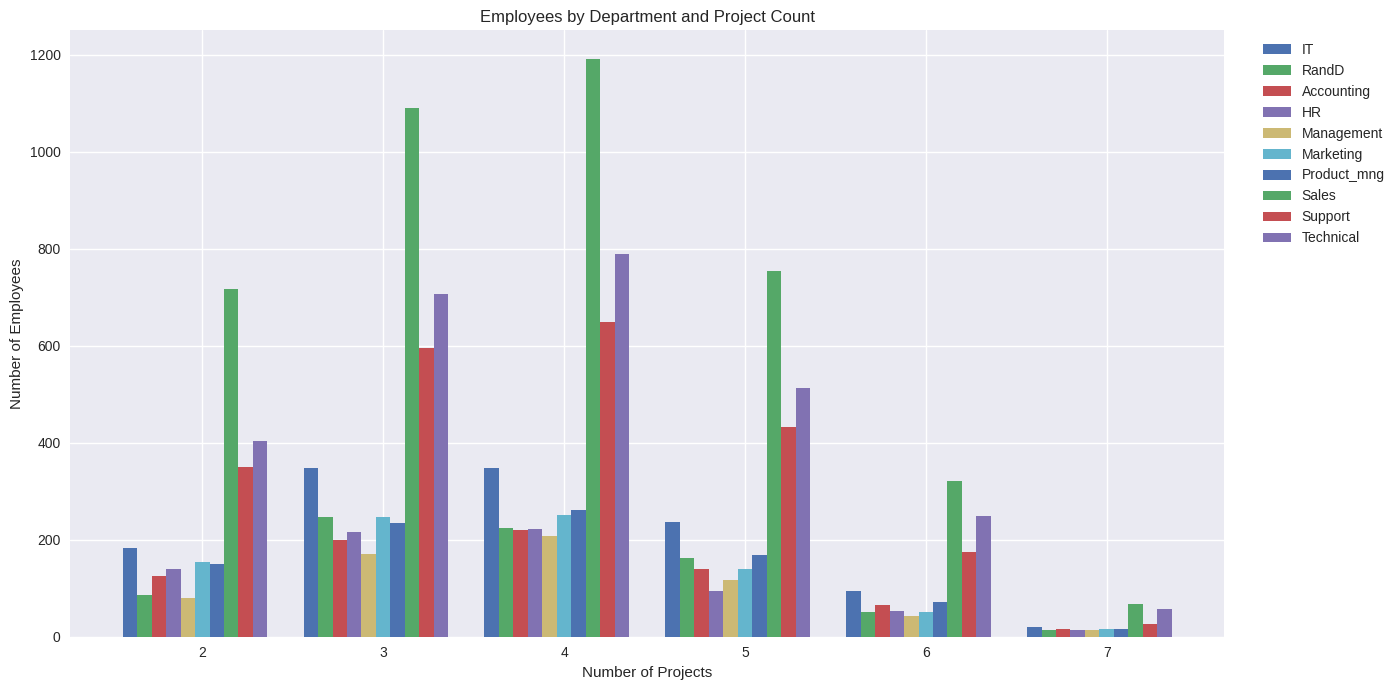

In [ ]:
# Bar Chart for Relationship between Department and Number Project
departments = ['IT', 'RandD', 'Accounting', 'HR', 'Management', 'Marketing',
               'Product_mng', 'Sales', 'Support', 'Technical']
project_counts = [2, 3, 4, 5, 6, 7]

data = {
    'IT': [182, 347, 347, 236, 95, 20],
    'RandD': [87, 247, 225, 163, 52, 13],
    'Accounting': [126, 199, 221, 140, 66, 15],
    'HR': [140, 216, 222, 94, 54, 13],
    'Management': [79, 171, 207, 118, 42, 13],
    'Marketing': [154, 247, 251, 140, 51, 15],
    'Product_mng': [149, 235, 262, 169, 71, 16],
    'Sales': [717, 1090, 1191, 755, 321, 67],
    'Support': [350, 596, 650, 433, 174, 26],
    'Technical': [404, 707, 790, 513, 248, 58]
}

# Plot setup
x = np.arange(len(project_counts))
bar_width = 0.08
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each department
for i, dept in enumerate(departments):
    offset = (i - len(departments)/2) * bar_width
    ax.bar(x + offset, data[dept], width=bar_width, label=dept)

# Labels and legend
ax.set_xlabel('Number of Projects')
ax.set_ylabel('Number of Employees')
ax.set_title('Employees by Department and Project Count')
ax.set_xticks(x)
ax.set_xticklabels(project_counts)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()


In [ ]:
#The relationship between the Departement and Time Spend Company
Dept_Time_Spend_Company_counts = employee_attrition_clean.groupby('Dept')['Time_Spend_Company'].value_counts().unstack(fill_value=0)
display(Dept_Time_Spend_Company_counts)

Time_Spend_Company,2,3,4,5,6,7,8,10
Dept,,,,,,,,
IT,268,523,215,131,52,12,10,16
RandD,181,341,132,81,42,0,10,0
accounting,142,335,160,75,31,0,14,10
hr,162,333,122,75,41,0,6,0
management,114,240,91,43,20,36,24,62
marketing,171,382,141,71,51,10,20,12
product_mng,201,386,149,91,39,18,8,10
sales,902,1769,666,403,185,110,48,58
support,515,974,364,229,109,0,12,26


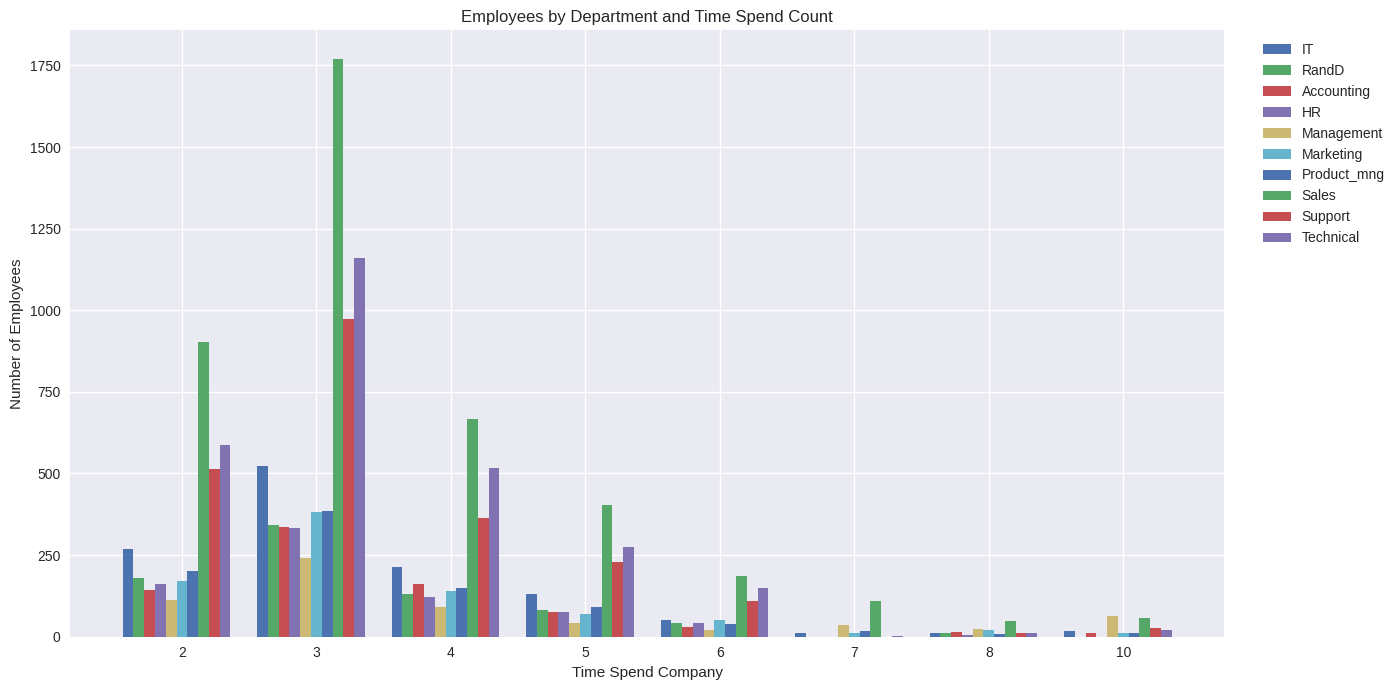

In [ ]:
# Bar Chart for Relationship between Department and Time Spend Company
departments = ['IT', 'RandD', 'Accounting', 'HR', 'Management', 'Marketing',
               'Product_mng', 'Sales', 'Support', 'Technical']
time_spend_counts = [2, 3, 4, 5, 6, 7, 8, 10]

data = {
    'IT' :	[268, 523, 215, 131, 52, 12, 10, 16],
    'RandD' :[181, 341, 132, 81, 42, 0, 10, 0],
    'Accounting' :	[142, 335, 160, 75, 31, 0, 14, 10],
    'HR':	[162, 333, 122, 75,	41,	0, 6,	0],
    'Management' :[114,	240,	91,	43,	20, 36,	24,	62],
    'Marketing' :	[171	,382,	141,	71,	51,	10,	20,	12],
    'Product_mng' :	[201,	386,	149,	91,	39,	18,	8,	10],
    'Sales' :	[902,	1769,	666,	403,	185,	110,	48,	58],
    'Support'	 : [515, 974,	364,	229,	109,	0,	12,	26],
    'Technical' :	[588, 1161,	517,	274,	148,	2,	10,	20]

}

# Plot setup
x = np.arange(len(time_spend_counts))
bar_width = 0.08
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each department
for i, dept in enumerate(departments):
    offset = (i - len(departments)/2) * bar_width
    ax.bar(x + offset, data[dept], width=bar_width, label=dept)

# Labels and legend
ax.set_xlabel('Time Spend Company')
ax.set_ylabel('Number of Employees')
ax.set_title('Employees by Department and Time Spend Count')
ax.set_xticks(x)
ax.set_xticklabels(time_spend_counts)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()


In [ ]:
#The relationship between the Departement and Work Accident
Dept_Work_Accident_counts = employee_attrition_clean.groupby('Dept')['Work_Accident'].value_counts().unstack(fill_value=0)
display(Dept_Work_Accident_counts)

Work_Accident,0,1
Dept,,
IT,1063,164
RandD,653,134
accounting,671,96
hr,650,89
management,527,103
marketing,720,138
product_mng,770,132
sales,3554,587
support,1884,345


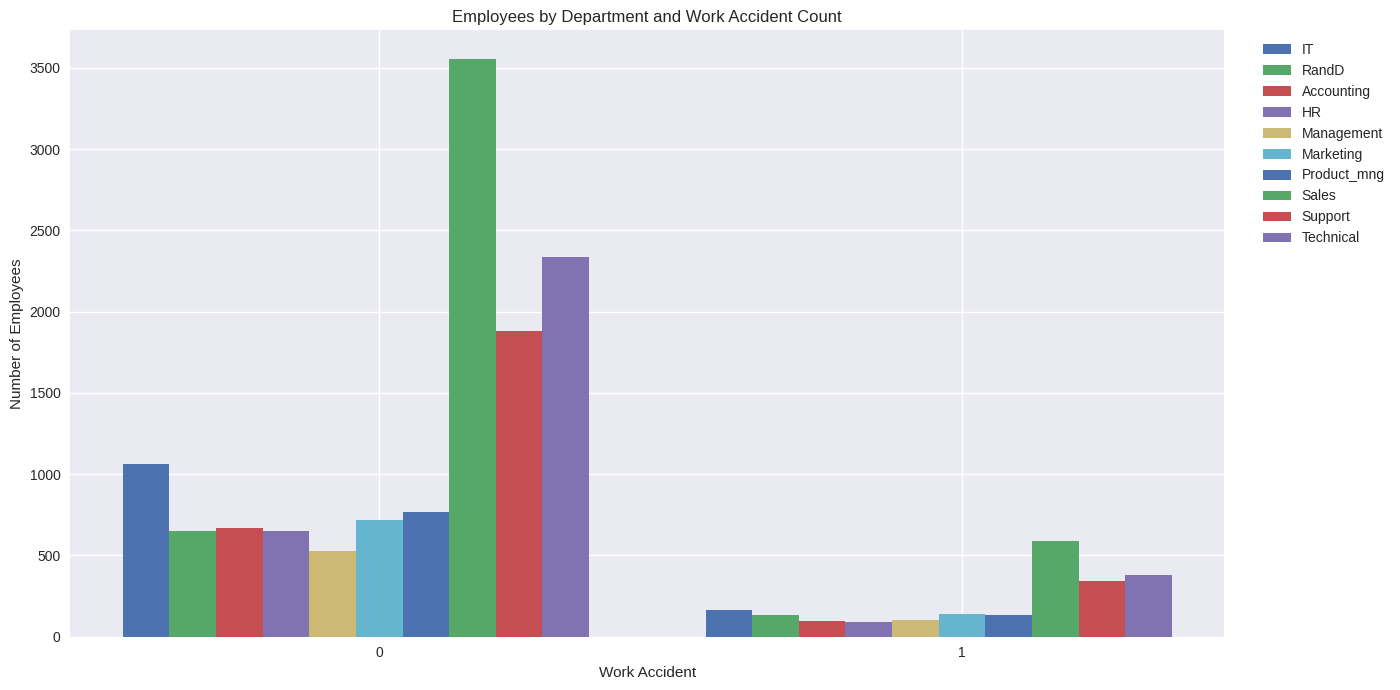

In [ ]:
# Bar Chart for Relationship between Department and Time Spend Company
departments = ['IT', 'RandD', 'Accounting', 'HR', 'Management', 'Marketing',
               'Product_mng', 'Sales', 'Support', 'Technical']
work_accident_counts = [0, 1]

data = {
    'IT' :	[1063,	164],
    'RandD' :[653,	134],
    'Accounting' :	[671,	96],
    'HR':	[650,	89],
    'Management' :[527, 103],
    'Marketing' :	[720,	138],
    'Product_mng' :	[770,	132],
    'Sales' :	[3554,	587],
    'Support'	 : [1884,	345],
    'Technical' :	[2339,	381]

}

# Plot setup
x = np.arange(len(work_accident_counts))
bar_width = 0.08
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each department
for i, dept in enumerate(departments):
    offset = (i - len(departments)/2) * bar_width
    ax.bar(x + offset, data[dept], width=bar_width, label=dept)

# Labels and legend
ax.set_xlabel('Work Accident')
ax.set_ylabel('Number of Employees')
ax.set_title('Employees by Department and Work Accident Count')
ax.set_xticks(x)
ax.set_xticklabels(work_accident_counts)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()


In [ ]:
#The relationship between the Departement and Promotion Last 5 Years
Dept_Promotion_Last5Years_counts = employee_attrition_clean.groupby('Dept')['Promotion_Last_5Years'].value_counts().unstack(fill_value=0)
display(Dept_Promotion_Last5Years_counts)

Promotion_Last_5Years,0,1
Dept,,
IT,1224,3
RandD,760,27
accounting,753,14
hr,724,15
management,561,69
marketing,815,43
product_mng,902,0
sales,4041,100
support,2209,20


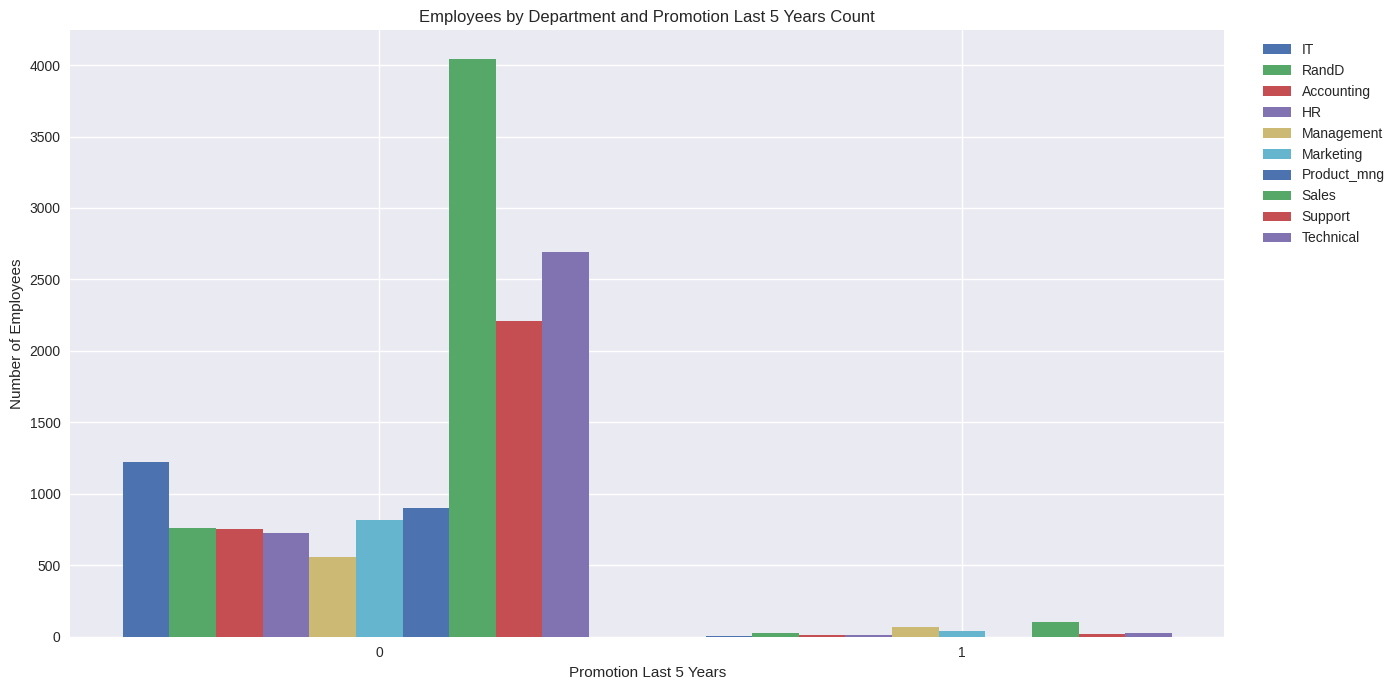

In [ ]:
# Bar Chart for Relationship between Department and Time Spend Company
departments = ['IT', 'RandD', 'Accounting', 'HR', 'Management', 'Marketing',
               'Product_mng', 'Sales', 'Support', 'Technical']
Promotion_Last5Years_counts = [0, 1]

data = {
    'IT' :	[1224,	3],
    'RandD' :[760,	27],
    'Accounting' :	[753,	14],
    'HR':	[724,	15],
    'Management' :[561,	69],
    'Marketing' :	[815,	43],
    'Product_mng' :	[902,	0],
    'Sales' :	[4041,	100],
    'Support'	 : [2209,	20],
    'Technical' :	[2692,	28]

}

# Plot setup
x = np.arange(len(Promotion_Last5Years_counts))
bar_width = 0.08
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each department
for i, dept in enumerate(departments):
    offset = (i - len(departments)/2) * bar_width
    ax.bar(x + offset, data[dept], width=bar_width, label=dept)

# Labels and legend
ax.set_xlabel('Promotion Last 5 Years')
ax.set_ylabel('Number of Employees')
ax.set_title('Employees by Department and Promotion Last 5 Years Count')
ax.set_xticks(x)
ax.set_xticklabels(Promotion_Last5Years_counts)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()


###OVERALL INSIGHT
The company likely operates in office-based or retail industries, where most employees work in sales roles. The majority are entry-level staff, typically managing around 4 to 5 projects while maintaining standard working hours (9 to 5). Employees usually remain with the company for about 2 to 4 years, receive relatively low salaries, and experience infrequent promotions. This aligns with the low employee satisfaction levels and the company’s low evaluation scores. On a positive note, workplace accidents are rare.